# Imports

In [15]:
import tensorflow as tf
import os
import sys
sys.path.append('../../')
import utils
import custom_metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
tfk = tf.keras 
tfkl = tfk.layers

# Setting Seed

In [16]:
seed = 17560

tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.compat.v1.set_random_seed(seed)

# Model Building

In [17]:
training_dir = os.path.join('.', 'training')
validation_dir = os.path.join('.', 'validation')

batch_size = 64
epochs = 1000
patience = 20
hiddens = 2 
neurons = [256, 128]
input_shape = (256, 256, 3)

train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=45,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2)

valid_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=45,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2)

train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=input_shape[:2],
                                               interpolation='bilinear',
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               classes=None,
                                               shuffle=True,
                                               seed=seed)  

valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=input_shape[:2],
                                               interpolation='bilinear',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               classes=None,
                                               shuffle=False,
                                               seed=seed)  
                                        

Found 14176 images belonging to 14 classes.
Found 3552 images belonging to 14 classes.


In [19]:
tl_model = utils.build_tl_vgg_model(hiddens=hiddens, neurons=neurons, input_shape=input_shape, seed=seed)

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=utils.metrics())
tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
Flattening (Flatten)         (None, 32768)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896 

# Training and Results Visualization

In [9]:
tl_history = tl_model.fit(
    x = train_gen,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_gen,
    class_weight=class_weights(),
    callbacks = callbacks("val_accuracy", "max", patience, 'custom_weights_cat_crossentropy_loss_model')
).history

[790, 373, 466, 964, 1166, 1398, 781, 612, 572, 211, 1292, 459, 538, 4554]
{0: 0.05471238316559939, 1: 0.11587877399684589, 2: 0.09275275257687451, 3: 0.04483691151537709, 4: 0.03706928190465139, 5: 0.0309175841922915, 6: 0.05534287157595841, 7: 0.07062546192945018, 8: 0.07556430542102012, 9: 0.2048473113783105, 10: 0.03345416617710798, 11: 0.09416728257260026, 12: 0.08033974479706973, 13: 0.00949116879684311}
Check that all sum up to ->  1.0
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/1000


2021-11-26 09:02:28.066761: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-26 09:02:28.066907: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-26 09:02:28.803307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.5361 - precision_m: 0.6548 - recall_m: 0.4637 - f1_m: 0.5402 - cat_acc: 0.5361 - tp: 6572.0000 - fp: 3644.0000 - tn: 180644.0000 - fn: 7604.0000 - precision: 0.6433 - recall: 0.4636 - auc: 0.8792 - prc: 0.5638

2021-11-26 09:07:22.421586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - 368s 2s/step - loss: 0.0931 - accuracy: 0.5361 - precision_m: 0.6548 - recall_m: 0.4637 - f1_m: 0.5402 - cat_acc: 0.5361 - tp: 6572.0000 - fp: 3644.0000 - tn: 180644.0000 - fn: 7604.0000 - precision: 0.6433 - recall: 0.4636 - auc: 0.8792 - prc: 0.5638 - val_loss: 0.7236 - val_accuracy: 0.7745 - val_precision_m: 0.8573 - val_recall_m: 0.6917 - val_f1_m: 0.7595 - val_cat_acc: 0.7745 - val_tp: 2457.0000 - val_fp: 279.0000 - val_tn: 45897.0000 - val_fn: 1095.0000 - val_precision: 0.8980 - val_recall: 0.6917 - val_auc: 0.9761 - val_prc: 0.8675


2021-11-26 09:08:36.913676: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 2/1000
222/222 [==============================] - 360s 2s/step - loss: 0.0422 - accuracy: 0.6819 - precision_m: 0.7910 - recall_m: 0.6151 - f1_m: 0.6908 - cat_acc: 0.6819 - tp: 8720.0000 - fp: 2296.0000 - tn: 181992.0000 - fn: 5456.0000 - precision: 0.7916 - recall: 0.6151 - auc: 0.9503 - prc: 0.7669 - val_loss: 0.6585 - val_accuracy: 0.8094 - val_precision_m: 0.8681 - val_recall_m: 0.7101 - val_f1_m: 0.7767 - val_cat_acc: 0.8094 - val_tp: 2527.0000 - val_fp: 331.0000 - val_tn: 45845.0000 - val_fn: 1025.0000 - val_precision: 0.8842 - val_recall: 0.7114 - val_auc: 0.9788 - val_prc: 0.8833
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 3/1000
222/222 [==============================] -

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 13/1000
222/222 [==============================] - 363s 2s/step - loss: 0.0206 - accuracy: 0.8578 - precision_m: 0.9075 - recall_m: 0.8231 - f1_m: 0.8628 - cat_acc: 0.8578 - tp: 11665.0000 - fp: 1192.0000 - tn: 183096.0000 - fn: 2511.0000 - precision: 0.9073 - recall: 0.8229 - auc: 0.9839 - prc: 0.9244 - val_loss: 0.3319 - val_accuracy: 0.9032 - val_precision_m: 0.9394 - val_recall_m: 0.8666 - val_f1_m: 0.9002 - val_cat_acc: 0.9032 - val_tp: 3080.0000 - val_fp: 189.0000 - val_tn: 45987.0000 - val_fn: 472.0000 - val_precision: 0.9422 - val_recall: 0.8671 - val_auc: 0.9925 - val_prc: 0.9595
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 14/1000
222/222 [==============================] - 363s 2s/step - loss: 0.0194 - accuracy: 0.8612 - precision_m: 0.9079 - recall_m: 0.

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 36/1000
222/222 [==============================] - 366s 2s/step - loss: 0.0110 - accuracy: 0.9096 - precision_m: 0.9392 - recall_m: 0.8845 - f1_m: 0.9108 - cat_acc: 0.9096 - tp: 12541.0000 - fp: 810.0000 - tn: 183478.0000 - fn: 1635.0000 - precision: 0.9393 - recall: 0.8847 - auc: 0.9937 - prc: 0.9665 - val_loss: 0.1576 - val_accuracy: 0.9564 - val_precision_m: 0.9749 - val_recall_m: 0.9305 - val_f1_m: 0.9516 - val_cat_acc: 0.9564 - val_tp: 3306.0000 - val_fp: 83.0000 - val_tn: 46093.0000 - val_fn: 246.0000 - val_precision: 0.9755 - val_recall: 0.9307 - val_auc: 0.9985 - val_prc: 0.9900
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 37/1000
222/222 [==============================] - 364s 2s/step - loss: 0.0112 - accuracy: 0.9168 - precision_m: 0.9459 - recall_m: 0.88

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 48/1000
222/222 [==============================] - 363s 2s/step - loss: 0.0102 - accuracy: 0.9191 - precision_m: 0.9449 - recall_m: 0.8929 - f1_m: 0.9180 - cat_acc: 0.9191 - tp: 12661.0000 - fp: 735.0000 - tn: 183553.0000 - fn: 1515.0000 - precision: 0.9451 - recall: 0.8931 - auc: 0.9939 - prc: 0.9687 - val_loss: 0.1677 - val_accuracy: 0.9547 - val_precision_m: 0.9774 - val_recall_m: 0.9311 - val_f1_m: 0.9531 - val_cat_acc: 0.9547 - val_tp: 3309.0000 - val_fp: 75.0000 - val_tn: 46101.0000 - val_fn: 243.0000 - val_precision: 0.9778 - val_recall: 0.9316 - val_auc: 0.9981 - val_prc: 0.9892
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 49/1000
222/222 [==============================] - 366s 2s/step - loss: 0.0100 - accuracy: 0.9201 - precision_m: 0.9459 - recall_m: 0.8959 - f1_m: 0.9200 - cat_acc: 0.9201 - tp: 12701.0000 - fp: 726.0000 - tn: 183562.0000 

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 60/1000
222/222 [==============================] - 372s 2s/step - loss: 0.0104 - accuracy: 0.9232 - precision_m: 0.9495 - recall_m: 0.9003 - f1_m: 0.9240 - cat_acc: 0.9232 - tp: 12760.0000 - fp: 681.0000 - tn: 183607.0000 - fn: 1416.0000 - precision: 0.9493 - recall: 0.9001 - auc: 0.9938 - prc: 0.9688 - val_loss: 0.1780 - val_accuracy: 0.9533 - val_precision_m: 0.9709 - val_recall_m: 0.9319 - val_f1_m: 0.9505 - val_cat_acc: 0.9533 - val_tp: 3311.0000 - val_fp: 97.0000 - val_tn: 46079.0000 - val_fn: 241.0000 - val_precision: 0.9715 - val_recall: 0.9322 - val_auc: 0.9965 - val_prc: 0.9848
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 61/1000
222/222 [==============================] - 377s 2s/step - loss: 0.0097 - accuracy: 0.9253 - precision_m: 0.9498 - recall_m: 0.9037 - f1_m: 0.9260 - cat_acc: 0.9253 - tp: 12809.0000 - fp: 679.0000 - tn: 183609.0000 

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 72/1000
222/222 [==============================] - 186s 837ms/step - loss: 0.0091 - accuracy: 0.9288 - precision_m: 0.9540 - recall_m: 0.9082 - f1_m: 0.9304 - cat_acc: 0.9288 - tp: 12873.0000 - fp: 622.0000 - tn: 183666.0000 - fn: 1303.0000 - precision: 0.9539 - recall: 0.9081 - auc: 0.9948 - prc: 0.9744 - val_loss: 0.1602 - val_accuracy: 0.9561 - val_precision_m: 0.9731 - val_recall_m: 0.9367 - val_f1_m: 0.9542 - val_cat_acc: 0.9561 - val_tp: 3328.0000 - val_fp: 88.0000 - val_tn: 46088.0000 - val_fn: 224.0000 - val_precision: 0.9742 - val_recall: 0.9369 - val_auc: 0.9982 - val_prc: 0.9892
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 73/1000
222/222 [==============================] - 187s 839ms/step - loss: 0.0091 - accuracy: 0.9318 - precision_m: 0.9567 - recall_m: 0.9103 - f1_m: 0.9328 - cat_acc: 0.9318 - tp: 12905.0000 - fp: 583.0000 - tn: 183705

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 84/1000
222/222 [==============================] - 358s 2s/step - loss: 0.0089 - accuracy: 0.9290 - precision_m: 0.9527 - recall_m: 0.9105 - f1_m: 0.9309 - cat_acc: 0.9290 - tp: 12907.0000 - fp: 640.0000 - tn: 183648.0000 - fn: 1269.0000 - precision: 0.9528 - recall: 0.9105 - auc: 0.9945 - prc: 0.9746 - val_loss: 0.1665 - val_accuracy: 0.9583 - val_precision_m: 0.9740 - val_recall_m: 0.9369 - val_f1_m: 0.9548 - val_cat_acc: 0.9583 - val_tp: 3330.0000 - val_fp: 86.0000 - val_tn: 46090.0000 - val_fn: 222.0000 - val_precision: 0.9748 - val_recall: 0.9375 - val_auc: 0.9975 - val_prc: 0.9880
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 85/1000
222/222 [==============================] - 358s 2s/step - loss: 0.0090 - accuracy: 0.9324 - precision_m: 0.9533 - recall_m: 0.9112 - f1_m: 0.9316 - cat_acc: 0.9324 - tp: 12916.0000 - fp: 634.0000 - tn: 183654.0000 

In [ ]:
name = 'crossentropy_' + utils.get_model_name(hiddens=hiddens, neurons=neurons)
tl_model.save(name)

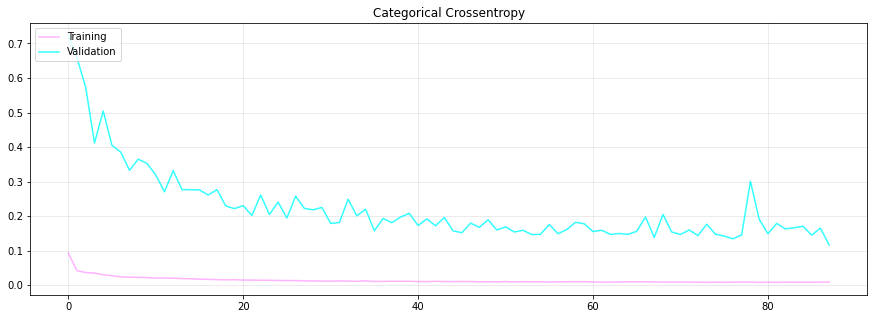

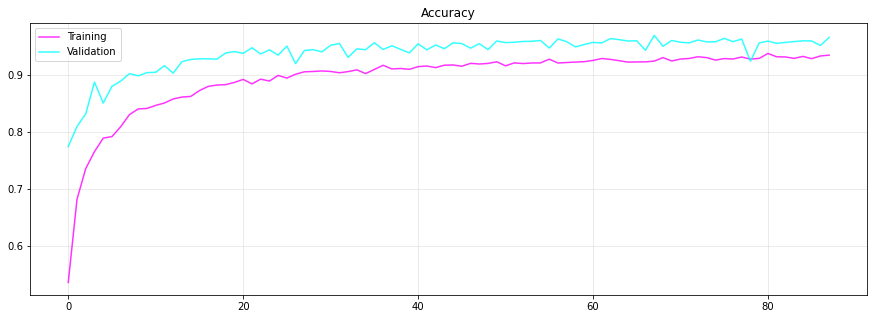

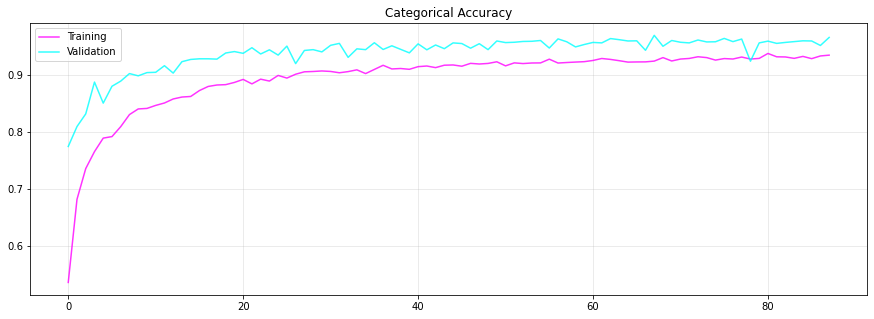

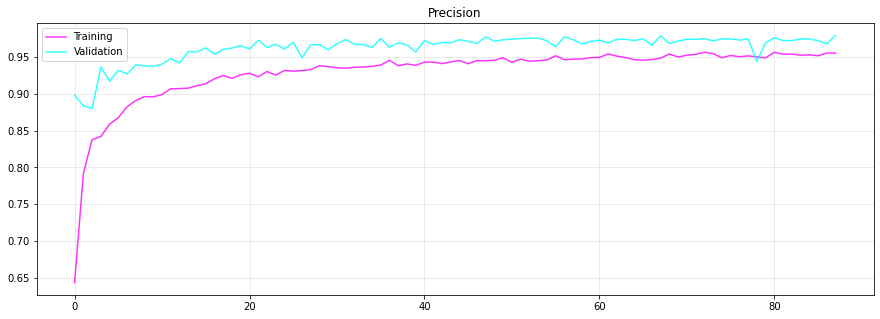

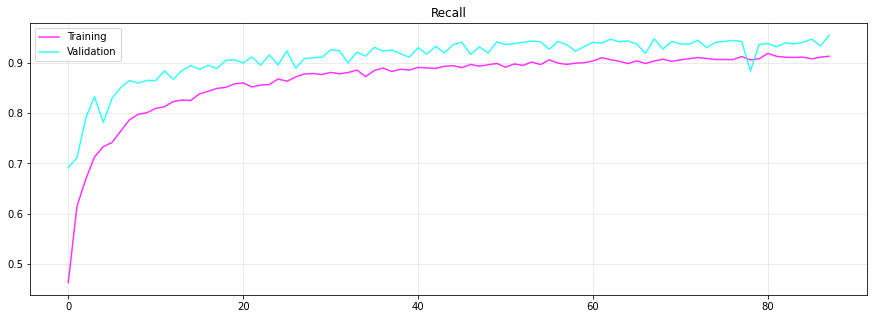

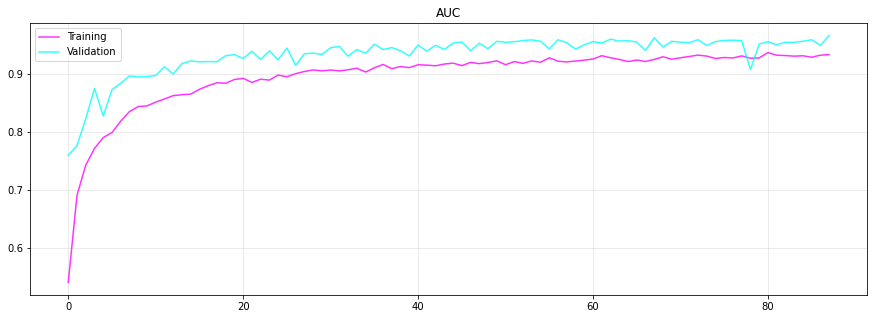

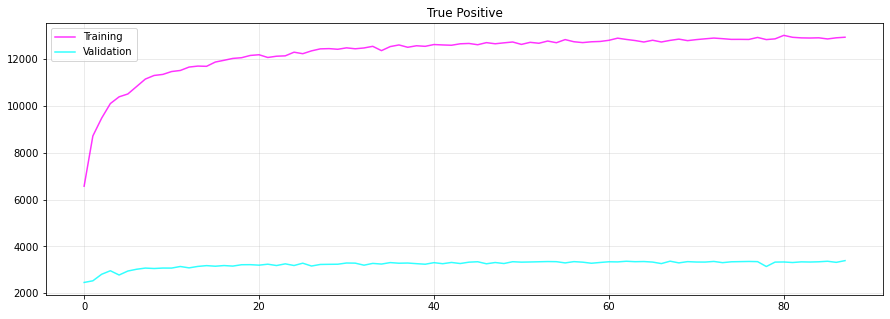

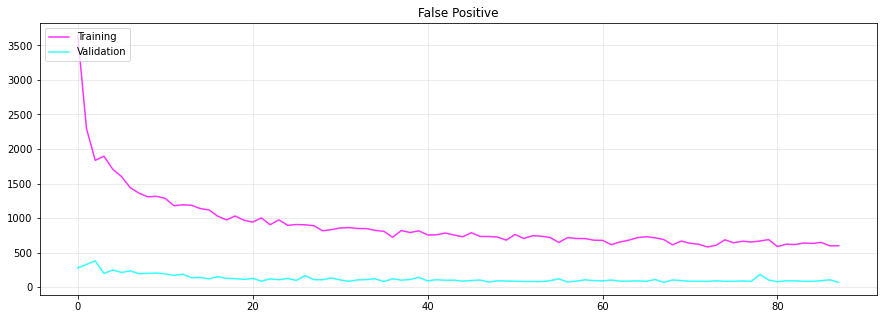

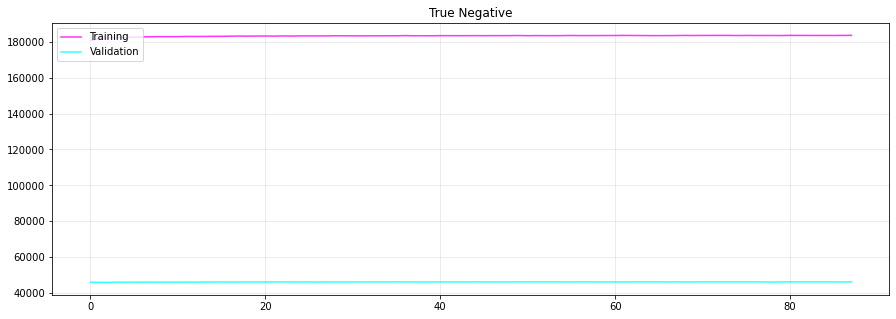

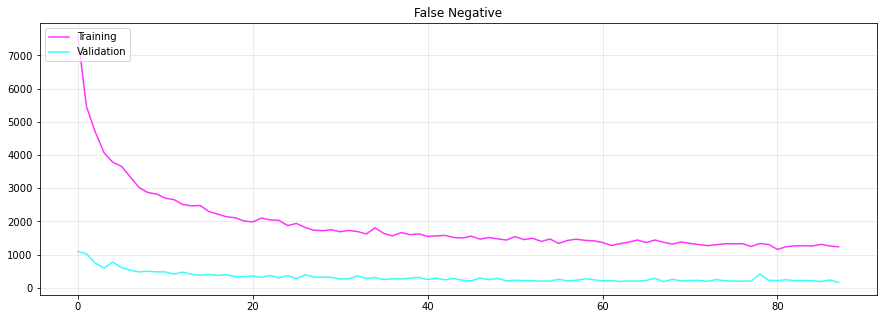

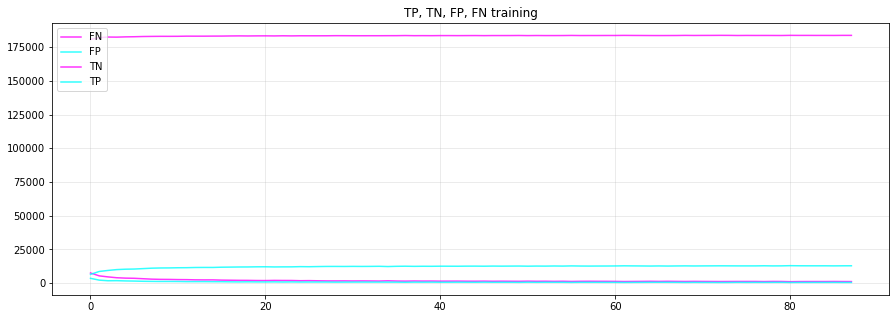

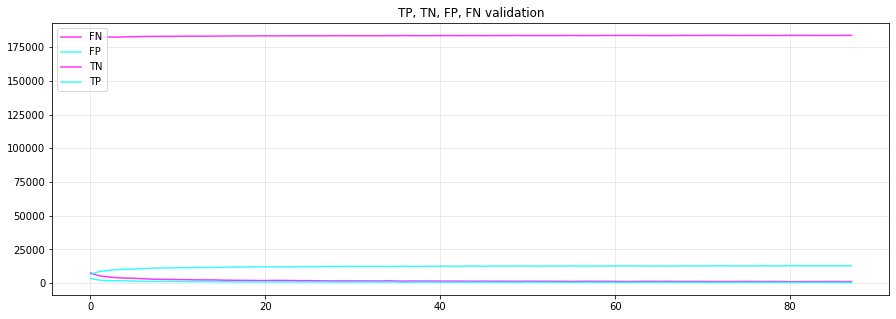

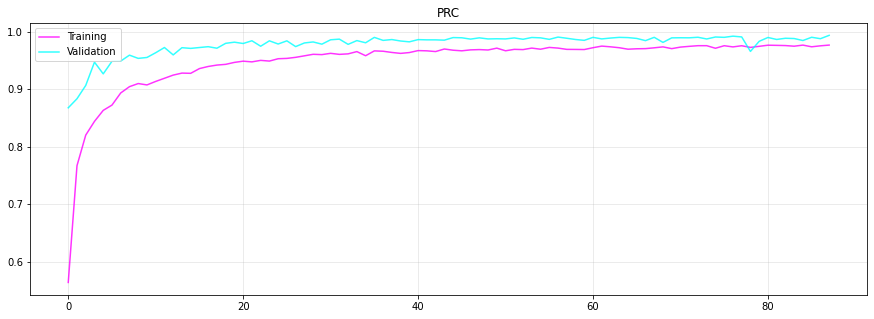

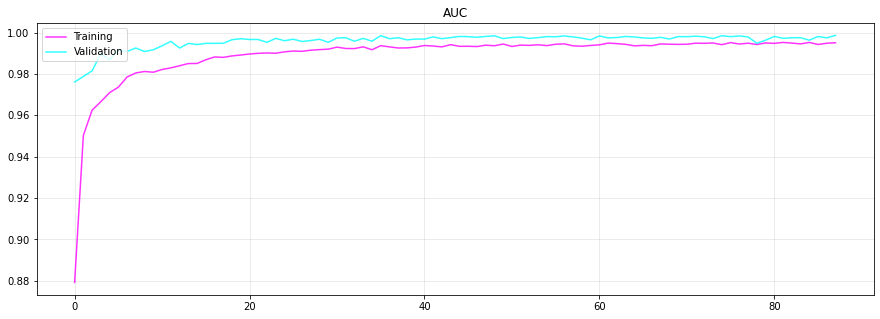

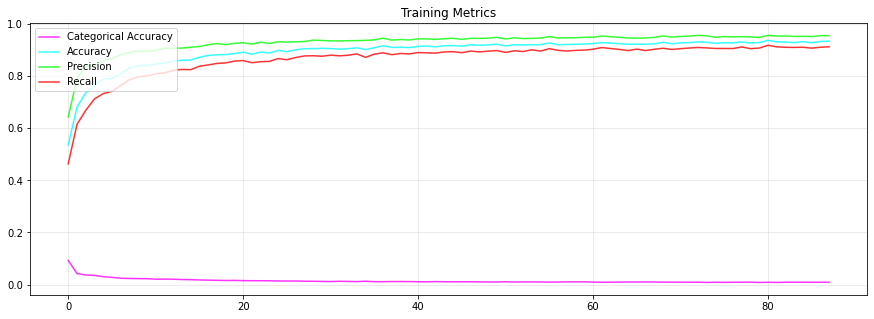

In [14]:
utils.plot_history(tl_history)

# Fine Tuning

In [33]:
# Set all VGG layers to True
ft_model = tfk.models.load_model(name, custom_objects={'f1_m': custom_metrics.f1_m, 'precision_m': custom_metrics.precision_m, 'recall_m': custom_metrics.recall_m}, compile=False)
ft_model.get_layer('vgg16').trainable = True # we get the layer by name, in the summary there are the names of all the names of the layers
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
    print(i, layer.name, layer.trainable) # all trainable layers

# Freeze first N layers, e.g., until 14th
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:14]):
    layer.trainable=False # Tipically the forst layers detect edges so we don't want to retrain these layers
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
    print(i, layer.name, layer.trainable)
    
ft_model.summary()

ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-5), metrics=utils.metrics())

ft_history = ft_model.fit(
    x = train_gen,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = callbacks("val_accuracy", "max", patience)
).history

0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_______________

2021-11-27 03:35:34.672264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9504 - precision_m: 0.9656 - recall_m: 0.9355 - f1_m: 0.9502 - cat_acc: 0.9504 - tp: 13262.0000 - fp: 473.0000 - tn: 183815.0000 - fn: 914.0000 - precision: 0.9656 - recall: 0.9355 - auc: 0.9958 - prc: 0.9834 - categorical_crossentropy: 0.0000e+00

2021-11-27 03:42:06.300151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


222/222 [==============================] - 463s 2s/step - loss: 0.1823 - accuracy: 0.9504 - precision_m: 0.9656 - recall_m: 0.9355 - f1_m: 0.9502 - cat_acc: 0.9504 - tp: 13262.0000 - fp: 473.0000 - tn: 183815.0000 - fn: 914.0000 - precision: 0.9656 - recall: 0.9355 - auc: 0.9958 - prc: 0.9834 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.1066 - val_accuracy: 0.9716 - val_precision_m: 0.9813 - val_recall_m: 0.9618 - val_f1_m: 0.9713 - val_cat_acc: 0.9716 - val_tp: 3415.0000 - val_fp: 65.0000 - val_tn: 46111.0000 - val_fn: 137.0000 - val_precision: 0.9813 - val_recall: 0.9614 - val_auc: 0.9982 - val_prc: 0.9930 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 2/1000
222/222 [==============================] - 414s 2s/step - loss: 0.1562 - accuracy: 0.9568 - precision_m: 0.9720 - recall_m: 0.9443 - f1_m: 0.9578 - 

Epoch 11/1000
222/222 [==============================] - 412s 2s/step - loss: 0.0834 - accuracy: 0.9753 - precision_m: 0.9850 - recall_m: 0.9666 - f1_m: 0.9757 - cat_acc: 0.9753 - tp: 13703.0000 - fp: 208.0000 - tn: 184080.0000 - fn: 473.0000 - precision: 0.9850 - recall: 0.9666 - auc: 0.9986 - prc: 0.9949 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0590 - val_accuracy: 0.9851 - val_precision_m: 0.9895 - val_recall_m: 0.9810 - val_f1_m: 0.9852 - val_cat_acc: 0.9851 - val_tp: 3485.0000 - val_fp: 37.0000 - val_tn: 46139.0000 - val_fn: 67.0000 - val_precision: 0.9895 - val_recall: 0.9811 - val_auc: 0.9993 - val_prc: 0.9977 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 12/1000
222/222 [==============================] - 415s 2s/step - loss: 0.0796 - accuracy: 0.9767 - precision_m: 0.9856 - recall_m: 0.9690 - f1_m: 0.9772 - cat_acc: 0.9767 - tp: 13736.0000 - fp: 201.0000 - tn: 184087.0000 - fn: 

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_best.ckpt/assets
Epoch 22/1000
222/222 [==============================] - 413s 2s/step - loss: 0.0639 - accuracy: 0.9806 - precision_m: 0.9885 - recall_m: 0.9735 - f1_m: 0.9809 - cat_acc: 0.9806 - tp: 13800.0000 - fp: 160.0000 - tn: 184128.0000 - fn: 376.0000 - precision: 0.9885 - recall: 0.9735 - auc: 0.9991 - prc: 0.9969 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0522 - val_accuracy: 0.9873 - val_precision_m: 0.9895 - val_recall_m: 0.9841 - val_f1_m: 0.9868 - val_cat_acc: 0.9873 - val_tp: 3495.0000 - val_fp: 37.0000 - val_tn: 46139.0000 - val_fn: 57.0000 - val_precision: 0.9895 - val_recall: 0.9840 - val_auc: 0.9989 - val_prc: 0.9965 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 23/1000
222/222 [==============================] - 413s 

222/222 [==============================] - 212s 955ms/step - loss: 0.0404 - accuracy: 0.9885 - precision_m: 0.9935 - recall_m: 0.9802 - f1_m: 0.9868 - cat_acc: 0.9885 - tp: 13895.0000 - fp: 91.0000 - tn: 184197.0000 - fn: 281.0000 - precision: 0.9935 - recall: 0.9802 - auc: 0.9996 - prc: 0.9983 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0445 - val_accuracy: 0.9876 - val_precision_m: 0.9907 - val_recall_m: 0.9866 - val_f1_m: 0.9887 - val_cat_acc: 0.9876 - val_tp: 3504.0000 - val_fp: 33.0000 - val_tn: 46143.0000 - val_fn: 48.0000 - val_precision: 0.9907 - val_recall: 0.9865 - val_auc: 0.9995 - val_prc: 0.9983 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 43/1000
222/222 [==============================] - 213s 956ms/step - loss: 0.0369 - accuracy: 0.9899 - precision_m: 0.9934 - recall_m: 0.9857 - f1_m: 0.9895 - cat_acc: 0.9899 - tp: 13973.0000 - fp: 93.0000 - tn: 184195.0000 - fn: 203.0000 -

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 53/1000
222/222 [==============================] - 212s 956ms/step - loss: 0.0394 - accuracy: 0.9886 - precision_m: 0.9910 - recall_m: 0.9866 - f1_m: 0.9888 - cat_acc: 0.9886 - tp: 13987.0000 - fp: 126.0000 - tn: 184162.0000 - fn: 189.0000 - precision: 0.9911 - recall: 0.9867 - auc: 0.9994 - prc: 0.9982 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0324 - val_accuracy: 0.9907 - val_precision_m: 0.9932 - val_recall_m: 0.9888 - val_f1_m: 0.9910 - val_cat_acc: 0.9907 - val_tp: 3512.0000 - val_fp: 24.0000 - val_tn: 46152.0000 - val_fn: 40.0000 - val_precision: 0.9932 - val_recall: 0.9887 - val_auc: 0.9995 - val_prc: 0.9986 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 54/1000
222/222 [==============================] - 212s 955ms/step - loss: 0.0340 - accuracy: 0.9906 - precision_m: 0.9929 - recall_m: 0.98

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 64/1000
222/222 [==============================] - 212s 955ms/step - loss: 0.0387 - accuracy: 0.9895 - precision_m: 0.9916 - recall_m: 0.9871 - f1_m: 0.9893 - cat_acc: 0.9895 - tp: 13993.0000 - fp: 119.0000 - tn: 184169.0000 - fn: 183.0000 - precision: 0.9916 - recall: 0.9871 - auc: 0.9992 - prc: 0.9978 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0436 - val_accuracy: 0.9896 - val_precision_m: 0.9921 - val_recall_m: 0.9886 - val_f1_m: 0.9903 - val_cat_acc: 0.9896 - val_tp: 3511.0000 - val_fp: 28.0000 - val_tn: 46148.0000 - val_fn: 41.0000 - val_precision: 0.9921 - val_recall: 0.9885 - val_auc: 0.9991 - val_prc: 0.9970 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 65/1000
222/222 [==============================] - 212s 955ms/step - loss: 0.0291 - accuracy: 0.9910 - precision_m: 0.9938 - recall_m: 0.98

INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets
Epoch 85/1000
222/222 [==============================] - 213s 958ms/step - loss: 0.0205 - accuracy: 0.9938 - precision_m: 0.9955 - recall_m: 0.9927 - f1_m: 0.9941 - cat_acc: 0.9938 - tp: 14072.0000 - fp: 64.0000 - tn: 184224.0000 - fn: 104.0000 - precision: 0.9955 - recall: 0.9927 - auc: 0.9998 - prc: 0.9993 - categorical_crossentropy: 0.0000e+00 - val_loss: 0.0419 - val_accuracy: 0.9887 - val_precision_m: 0.9924 - val_recall_m: 0.9872 - val_f1_m: 0.9897 - val_cat_acc: 0.9887 - val_tp: 3506.0000 - val_fp: 27.0000 - val_tn: 46149.0000 - val_fn: 46.0000 - val_precision: 0.9924 - val_recall: 0.9870 - val_auc: 0.9996 - val_prc: 0.9986 - val_categorical_crossentropy: 0.0000e+00
INFO:tensorflow:Assets written to: ./ckpts-2_hidden_layer_256-128/cp_last.ckpt/assets


In [ ]:
ft_model.save(name + "_ft")